Water Quality Data Time Series from the [Florida St Johns River Water Management District (SJRWMD)](https://www.sjrwmd.com/data/water-quality/)

Standard Physical and Chemical In-Situ Oceanic/Water Quality Variables of the Indian River Lagoon, Merritt Island, NASA Kennedy Space Center, Florida are collected and hosted by the **[SJRWMD page](http://webapub.sjrwmd.com/agws10/hdswq/)**. I do have access to the FTP but it is single user/password enabled so the map page is the primary method of downloading data. Data is formated by variable, by individual sensor, collected every hour, and aggregated into **.CSV** files.

This notebook should import and read the **.CSV** file for Water Temperature, Conductivity, and Chlorophyll.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas

In [2]:
# SST Data
sst = pd.read_csv(r'IRL\33954622_WATER_TEMP.csv', skiprows=9, names=['Date/Time', 'Parameter', 'Value', 'Units', 'Station ID', 'Comments'])
sst['Date/Time'] = pd.to_datetime(sst['Date/Time'], infer_datetime_format=True)
df_sst_dt = pd.DataFrame(sst, columns=['Date/Time'])
df_sst = pd.DataFrame(sst, columns=['Value'])
df_sst2 = pd.DataFrame(sst, columns=['Date/Time', 'Value'])

# Conductivity Data
cdt = pd.read_csv(r'IRL\33954622_CONDUCTIVITY.csv', skiprows=9, names=['Date/Time', 'Parameter', 'Value', 'Units', 'Station ID', 'Comments'])
cdt['Date/Time'] = pd.to_datetime(cdt['Date/Time'], infer_datetime_format=True)
df_cdt_dt = pd.DataFrame(cdt, columns=['Date/Time'])
df_cdt = pd.DataFrame(cdt, columns=['Value'])
df_cdt2 = df_cdt / 1000 # uS/cm to mS/cm
df_cdt3 = pd.DataFrame(cdt, columns=['Date/Time', 'Value'])
df_cdt3['Value'] = df_cdt3['Value'] / 1000 # uS/cm to mS/cm

# Chlorophyll Data
chl = pd.read_csv(r'IRL\33954622_RELATIVE_CHLOROPHYLL.csv', skiprows=9, names=['Date/Time', 'Parameter', 'Value', 'Units', 'Station ID', 'Comments'])
chl['Date/Time'] = pd.to_datetime(chl['Date/Time'], infer_datetime_format=True)
df_chl_dt = pd.DataFrame(chl, columns=['Date/Time'])
df_chl = pd.DataFrame(chl, columns=['Value'])
df_chl2 = pd.DataFrame(chl, columns=['Date/Time', 'Value'])

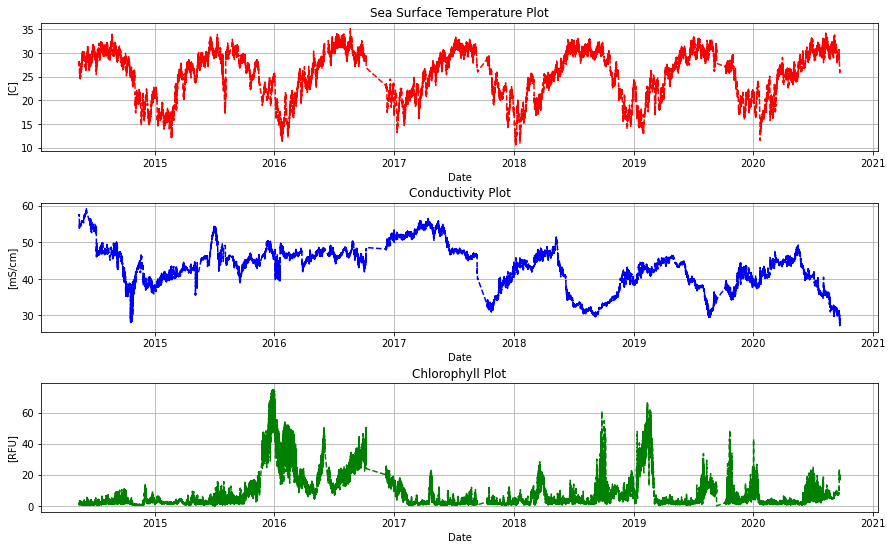

In [3]:
# Main Plot
plt.figure(figsize=(15,9))
plt.subplots_adjust(hspace = .4)

# SST
plt.subplot(311)
plt.plot(df_sst_dt, df_sst, 'r--')
plt.title("Sea Surface Temperature Plot")
plt.xlabel('Date')
plt.ylabel('[C]')
plt.grid()

# Conductivity
plt.subplot(312)
plt.plot(df_cdt_dt, df_cdt2, 'b--')
plt.title("Conductivity Plot")
plt.xlabel('Date')
plt.ylabel('[mS/cm]')
plt.grid()

# Chlorophyll
plt.subplot(313)
plt.plot(df_chl_dt, df_chl, 'g--')
plt.title("Chlorophyll Plot")
plt.xlabel('Date')
plt.ylabel('[RFU]')
plt.grid()

In [4]:
# Advanced Plotting
# SST
df_sst2.hvplot.line(x='Date/Time', y='Value', xlabel='Date & Time', ylabel='SST [C]', title='Sea Surface Temperature')

:Curve   [Date/Time]   (Value)

In [5]:
# Conductivity
df_cdt3.hvplot.line(x='Date/Time', y='Value', xlabel='Date & Time', ylabel='Sp Con [mS/cm]', title='Conductivity')

:Curve   [Date/Time]   (Value)

In [6]:
# Chlorophyll
df_chl2.hvplot.line(x='Date/Time', y='Value', xlabel='Date & Time', ylabel='Chl [RFU]', title='Chlorophyll')

:Curve   [Date/Time]   (Value)